**PROJECT**

---



**AMAZON SALES ANALYSIS**


Sales management has gained importance to meet increasing competition and the
need for improved methods of distribution to reduce cost and to increase profits. Sales
management today is the most important function in a commercial and business
enterprise.

Dataset includes the following features:

Region

Country

Item Type

Sales Channel

Order Priority

Order Date

Order ID

Ship Date

Unit Sold

Unit Price

Unit Cost

Total Revenue

Total Cost

Total Profit



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/Amazon Sales data.csv")
print(df.head())

                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H  5/28/2010  669165933  6/27/2010        9925   
1        Online              C  8/22/2012  963881480  9/15/2012        2804   
2       Offline              L   5/2/2014  341417157   5/8/2014        1779   
3        Online              C  6/20/2014  514321792   7/5/2014        8102   
4       Offline              L   2/1/2013  115456712   2/6/2013        5062   

   Unit Price  Unit Cost  Total Revenue  Tot

In [3]:
df.shape

(100, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [5]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [6]:
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

There are no null values but it is observed that order date of few orders is after the shipping date given.we have to delete records of such orders.

In [7]:
df.drop(df[df['Order Date'] > df['Ship Date']].index, inplace=True)
print(df.head(10))
df.shape


                               Region                Country        Item Type  \
0               Australia and Oceania                 Tuvalu        Baby Food   
1   Central America and the Caribbean                Grenada           Cereal   
2                              Europe                 Russia  Office Supplies   
3                  Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                  Sub-Saharan Africa                 Rwanda  Office Supplies   
6                  Sub-Saharan Africa                 Angola        Household   
7                  Sub-Saharan Africa           Burkina Faso       Vegetables   
8                  Sub-Saharan Africa  Republic of the Congo    Personal Care   
9                  Sub-Saharan Africa                Senegal           Cereal   
10                               Asia             Kyrgyzstan       Vegetables   

   Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0        Offline            

(79, 14)

In [8]:
 #finding the waiting period of each order.
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['waiting period'] = (df['Ship Date'] - df['Order Date']).dt.days
print(df["waiting period"])

0     30
1     24
2      6
3     15
4      5
      ..
95    39
96    47
97    28
98     9
99     5
Name: waiting period, Length: 79, dtype: int64


In [9]:
print(df.head(20))

                               Region                Country        Item Type  \
0               Australia and Oceania                 Tuvalu        Baby Food   
1   Central America and the Caribbean                Grenada           Cereal   
2                              Europe                 Russia  Office Supplies   
3                  Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                  Sub-Saharan Africa                 Rwanda  Office Supplies   
6                  Sub-Saharan Africa                 Angola        Household   
7                  Sub-Saharan Africa           Burkina Faso       Vegetables   
8                  Sub-Saharan Africa  Republic of the Congo    Personal Care   
9                  Sub-Saharan Africa                Senegal           Cereal   
10                               Asia             Kyrgyzstan       Vegetables   
12                               Asia             Bangladesh          Clothes   
14                          

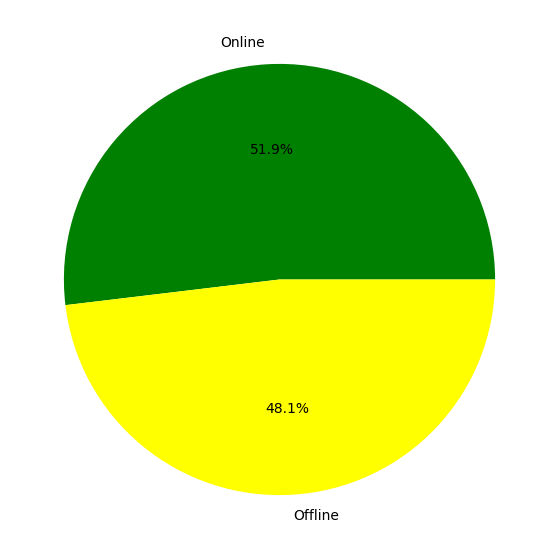

In [10]:
#Pie chart for comparision of online and offline sales

count = df['Sales Channel'].value_counts()
List_Of_Labels = ['Online','Offline']
plt.figure(figsize=(10,7))
plt.pie(count,labels=List_Of_Labels,autopct='%1.1f%%',colors=['Green','Yellow'])

plt.show()

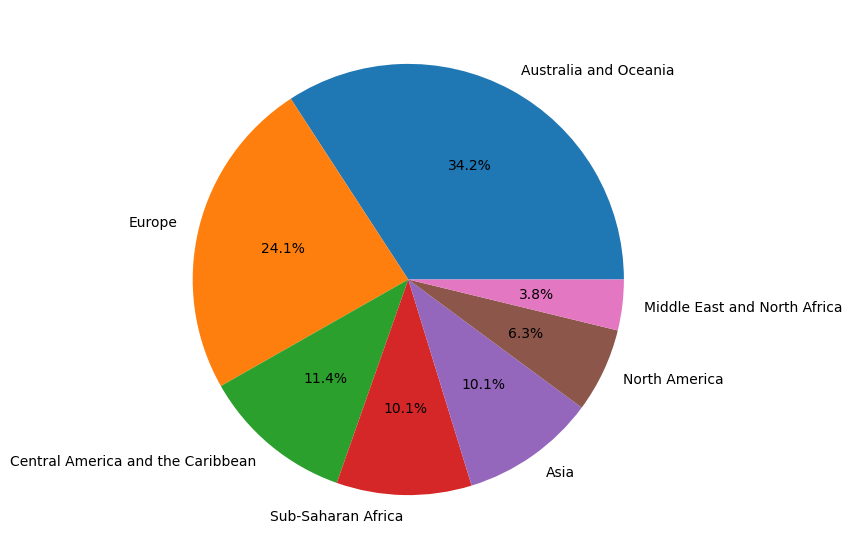

In [11]:
#sales per Region

count = df['Region'].value_counts()
List_Of_Labels = ['Australia and Oceania','Europe','Central America and the Caribbean','Sub-Saharan Africa','Asia','North America','Middle East and North Africa']
plt.figure(figsize=(10,7))
plt.pie(count,labels=List_Of_Labels,autopct='%1.1f%%')
plt.show()

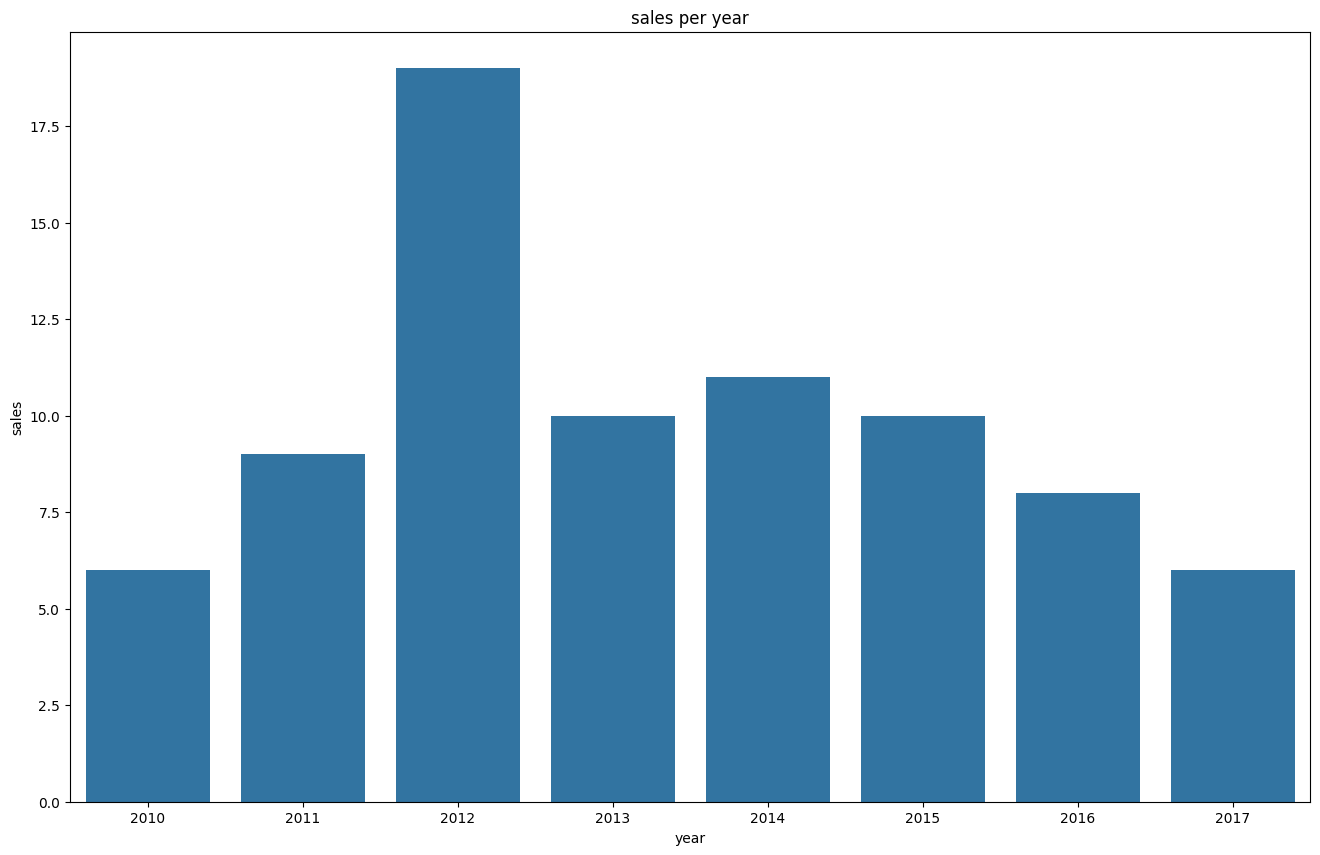

In [12]:
df['order year'] = df['Order Date'].dt.year
plt.figure(figsize=(16, 10))
chart = sns.countplot(x="order year", data=df)
plt.title("sales per year")
plt.xlabel("year")
plt.ylabel("sales")
plt.show()

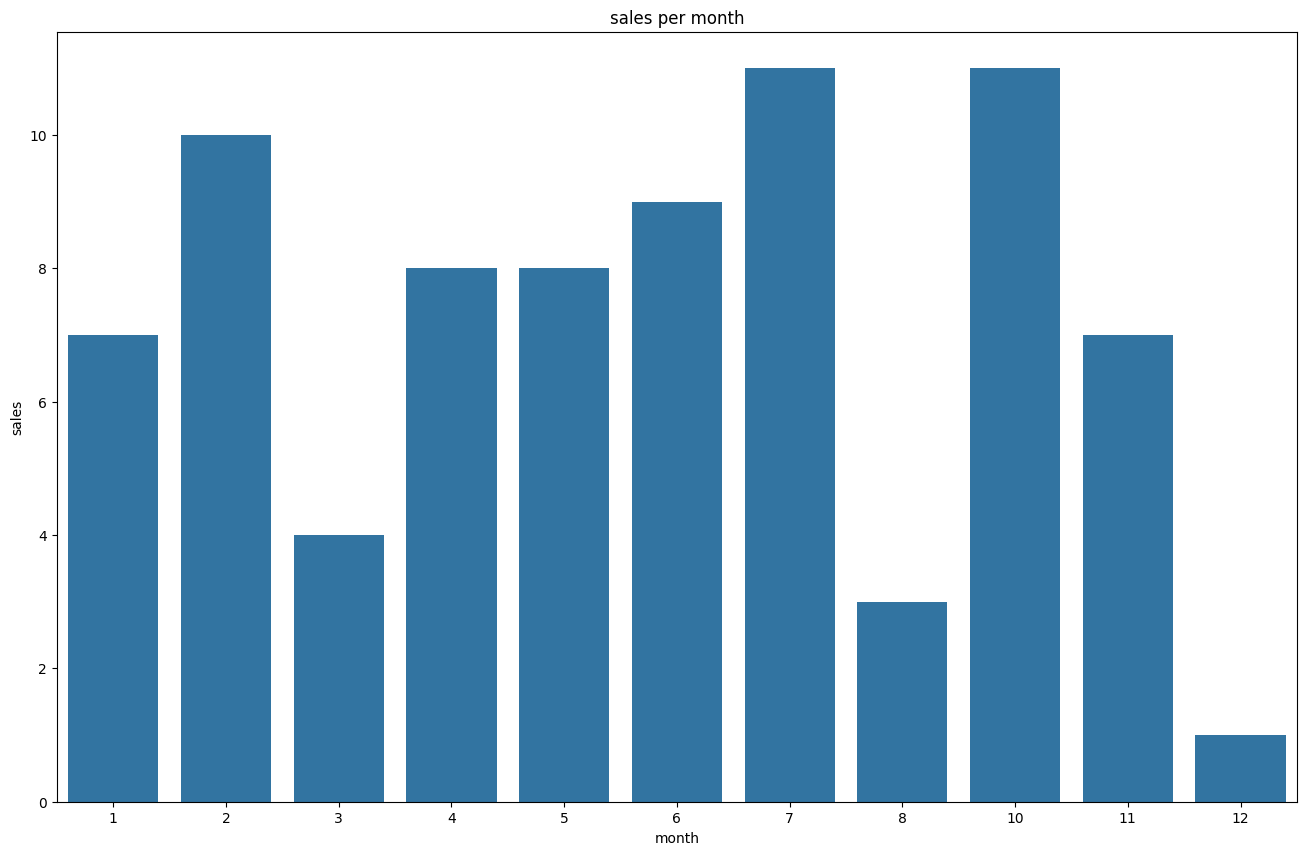

In [13]:
#Sales per month
df['order month'] = df['Order Date'].dt.month
plt.figure(figsize=(16, 10))
chart = sns.countplot(x="order month", data=df)
plt.title("sales per month")
plt.xlabel("month")
plt.ylabel("sales")
plt.show()

In [14]:
df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,waiting period,order year,order month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,30,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,24,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,6,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,15,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,5,2013,2
6,Sub-Saharan Africa,Angola,Household,Offline,M,2011-04-23,135425221,2011-04-27,4187,668.27,502.54,2798046.49,2104134.98,693911.51,4,2011,4
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,2012-07-17,871543967,2012-07-27,8082,154.06,90.93,1245112.92,734896.26,510216.66,10,2012,7
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,2015-07-14,770463311,2015-08-25,6070,81.73,56.67,496101.10,343986.90,152114.20,42,2015,7
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,2014-04-18,616607081,2014-05-30,6593,205.70,117.11,1356180.10,772106.23,584073.87,42,2014,4
10,Asia,Kyrgyzstan,Vegetables,Online,H,2011-06-24,814711606,2011-07-12,124,154.06,90.93,19103.44,11275.32,7828.12,18,2011,6


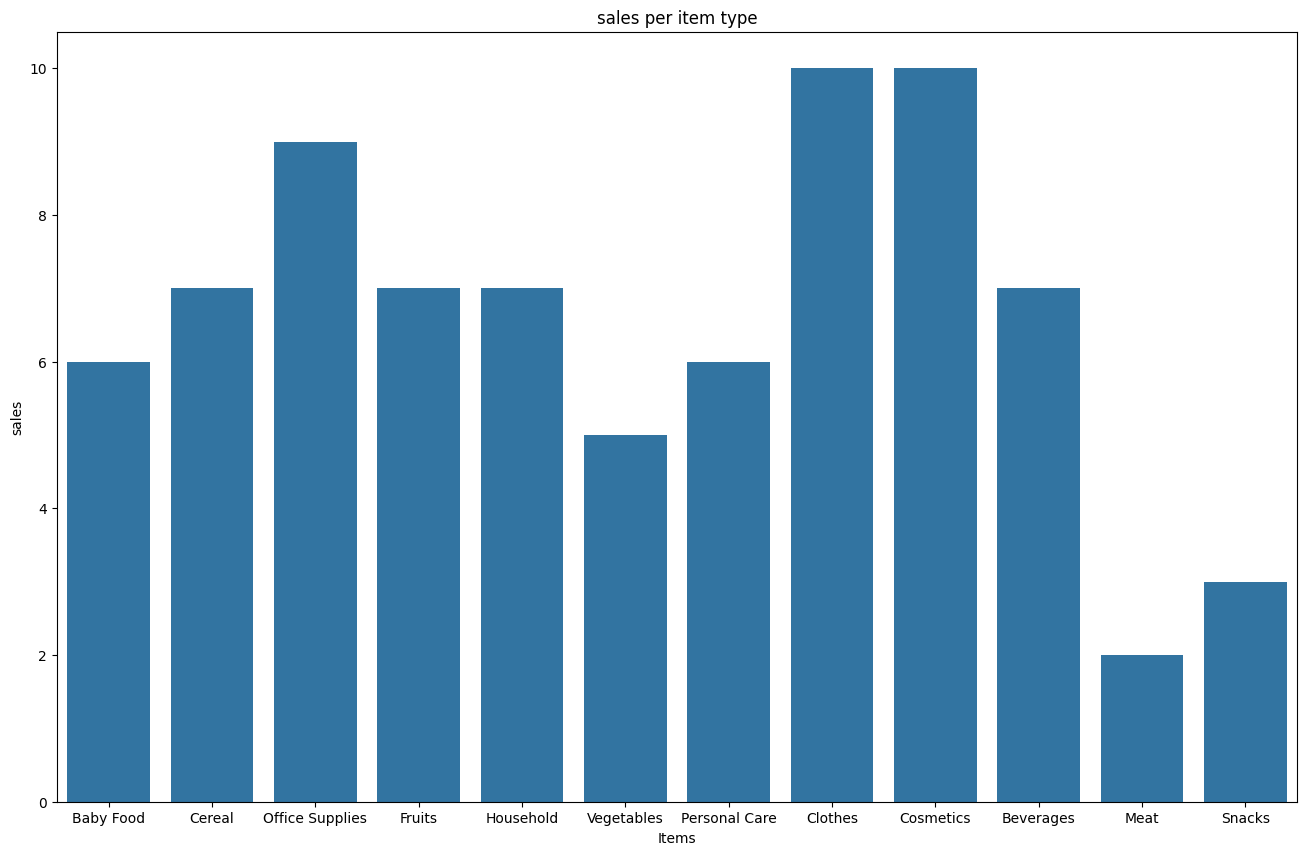

In [15]:
plt.figure(figsize=(16, 10))
chart = sns.countplot(x="Item Type", data=df)
plt.title("sales per item type")
plt.xlabel("Items")
plt.ylabel("sales")
plt.show()

In [16]:
df.loc[:,["Total Revenue","Total Profit"]].iloc[:]

,Total Revenue,Total Profit
0,2533654.00,951410.50
1,576782.80,248406.36
2,1158502.59,224598.75
3,75591.66,19525.82
4,3296425.02,639077.50
...,...,...
95,97040.64,65214.72
96,58471.11,15103.47
97,228779.10,93748.05
98,471336.91,144521.02


In [17]:
result = df.groupby('Item Type').agg({'Total Profit': ['mean', 'min', 'max']})
result

Total Profit                       
                         mean        min         max
Item Type                                           
Baby Food        6.002593e+05  122029.78   951410.50
Beverages        1.058594e+05   72975.60   146875.14
Cereal           3.274919e+05   60418.38   766835.04
Clothes          4.092517e+05   65214.72   727423.20
Cosmetics        1.053791e+06  296448.35  1719922.04
Fruits           1.182690e+04    1258.02    23150.46
Household        7.557998e+05   46735.86  1367272.50
Meat             3.053050e+05  272672.40   337937.60
Office Supplies  5.196450e+05  159832.50  1046233.75
Personal Care    1.454775e+05   75555.90   216919.36
Snacks           2.506481e+05  122686.50   404010.78
Vegetables       2.060437e+05    7828.12   510216.66

These are the minimum,maximum and average total profit by item type.

In [18]:
result1 = df.groupby('Item Type').agg({'Total Revenue': ['mean', 'min', 'max']})
result1

Total Revenue                        
                         mean         min         max
Item Type                                            
Baby Food        1.598521e+06   324971.44  2533654.00
Beverages        3.207552e+05   221117.00   445033.55
Cereal           7.604141e+05   140287.40  1780539.20
Clothes          6.089737e+05    97040.64  1082418.40
Cosmetics        2.649782e+06   745426.00  4324782.40
Fruits           4.578631e+04     4870.26    89623.98
Household        3.047598e+06   188452.14  5513227.50
Meat             2.251838e+06  2011149.63  2492526.12
Office Supplies  2.680380e+06   824431.86  5396577.27
Personal Care    4.744563e+05   246415.95   707454.88
Snacks           6.935778e+05   339490.50  1117953.66
Vegetables       5.028210e+05    19103.44  1245112.92

These are the minimum,maximum and average total Revenue by item type.

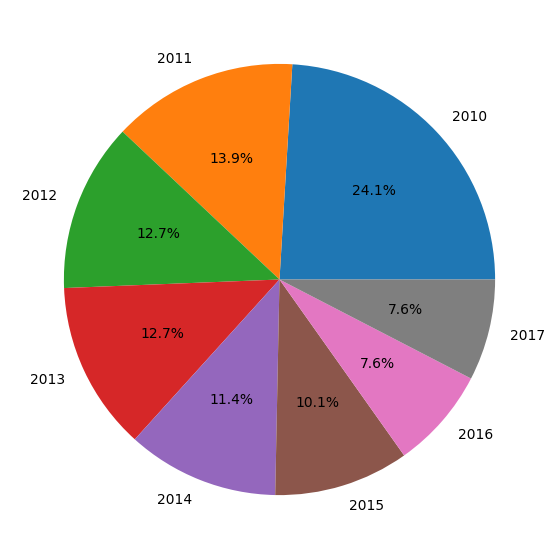

In [19]:
#Orders percentage per year

count =df['order year'].value_counts()
List_Of_Labels = ['2010','2011','2012','2013','2014','2015','2016','2017']
plt.figure(figsize=(10,7))
plt.pie(count,labels=List_Of_Labels,autopct='%1.1f%%')
plt.show()



In [20]:
Total_units_sold=df['Units Sold'].sum()
print(f"Total_units_sold=",Total_units_sold)

Total_units_sold= 405882


In [21]:
sum_of_Total_profits=df['Total Profit'].sum()
print(f"sum_of_Total_profit=",sum_of_Total_profits)

sum_of_Total_profit= 34581275.05


In [32]:
sum_of_Total_cost=df['Total Cost'].sum()
print(f"sum_of_Total_cost=",sum_of_Total_cost)

sum_of_Total_cost= 72887952.75


In [33]:
sum_of_Total_revenue=df['Total Revenue'].sum()
print(f"sum_of_Total_revenue=",sum_of_Total_revenue)

sum_of_Total_revenue= 107469227.8


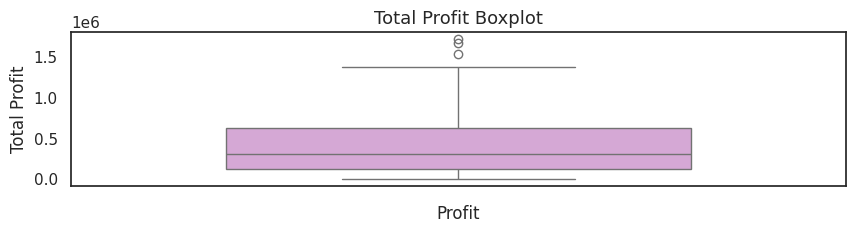

In [24]:
import matplotlib.pyplot as plt
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(df['Total Profit'], color="plum", width=.6)

plt.title('Total Profit Boxplot', fontsize=13)
plt.xlabel('Profit')
plt.show()

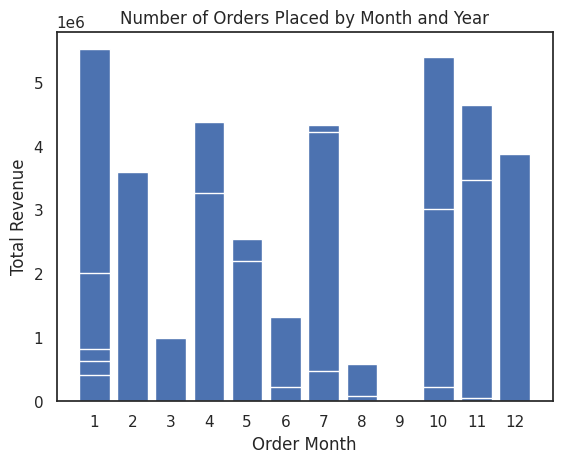

In [34]:
# Creating a bar chart for Total Revenue and Order Month
plt.bar(df['order month'], df['Total Revenue'])

# Set the chart title and axis labels
plt.title('Number of Orders Placed by Month and Year')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Order Month')
plt.ylabel('Total Revenue')

# Rotate the x-axis labels for better readability

# Display the chart
plt.show()

Text(0.5, 1.0, 'Profit per year')

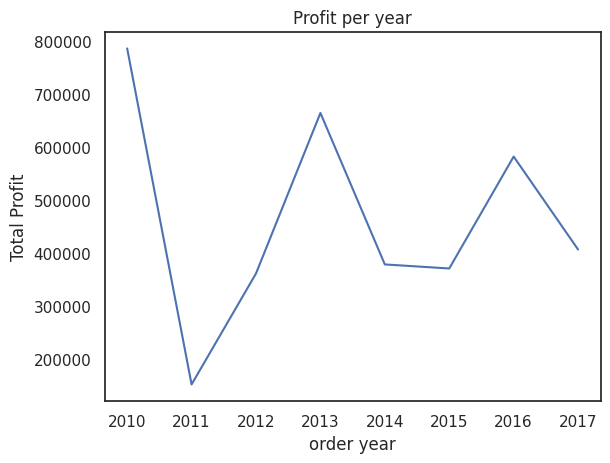

In [26]:
df.groupby('order year')['Total Profit'].mean().plot()
plt.xlabel('order year')
plt.ylabel('Total Profit')
plt.title('Profit per year')

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, 'Snacks'),
  Text(0.0, 0, 'Baby Food'),
  Text(2.0, 0, 'Cereal'),
  Text(4.0, 0, 'Cosmetics'),
  Text(6.0, 0, 'Household'),
  Text(8.0, 0, 'Office Supplies'),
  Text(10.0, 0, 'Snacks'),
  Text(12.0, 0, '')])

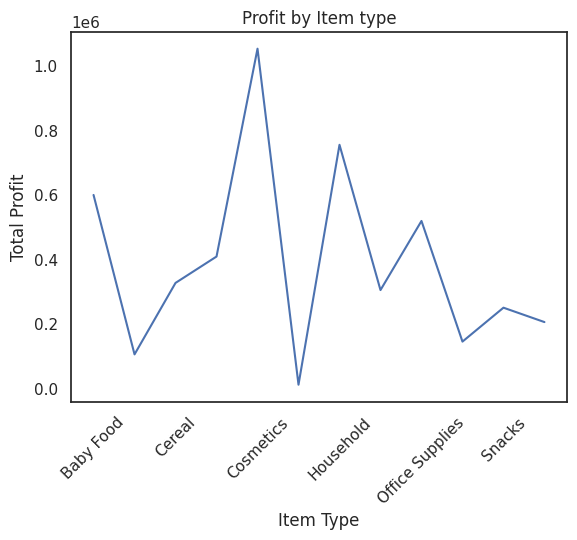

In [27]:
df.groupby('Item Type')['Total Profit'].mean().plot()
plt.xlabel('Item Type')
plt.ylabel('Total Profit')
plt.title('Profit by Item type')
plt.xticks(rotation=45)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, 'Sub-Saharan Africa'),
  Text(0.0, 0, 'Asia'),
  Text(1.0, 0, 'Australia and Oceania'),
  Text(2.0, 0, 'Central America and the Caribbean'),
  Text(3.0, 0, 'Europe'),
  Text(4.0, 0, 'Middle East and North Africa'),
  Text(5.0, 0, 'North America'),
  Text(6.0, 0, 'Sub-Saharan Africa'),
  Text(7.0, 0, '')])

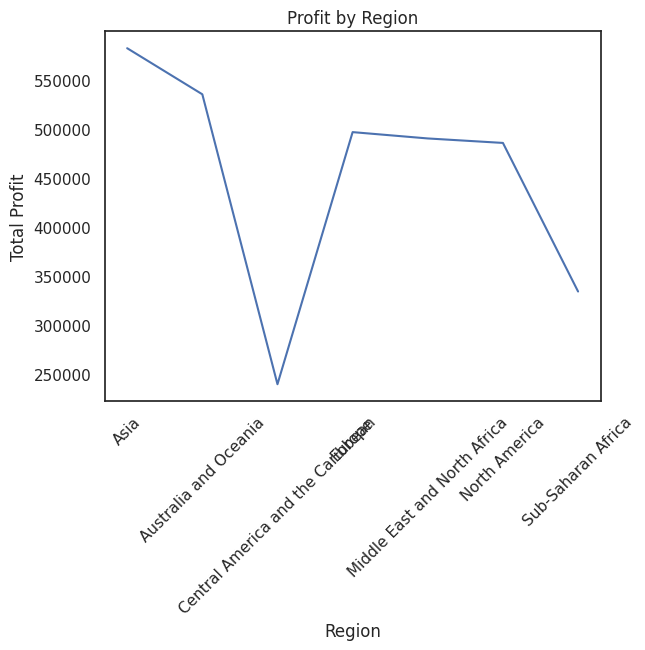

In [28]:
df.groupby('Region')['Total Profit'].mean().plot()
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.title('Profit by Region')
plt.xticks(rotation=45)

In [29]:
revenue_by_category = df.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)
print(revenue_by_category)

Item Type
Cosmetics          26497817.60
Office Supplies    24123423.24
Household          21333183.21
Baby Food           9591124.88
Clothes             6089737.28
Cereal              5322898.90
Meat                4503675.75
Personal Care       2846737.63
Vegetables          2514105.14
Beverages           2245286.55
Snacks              2080733.46
Fruits               320504.16
Name: Total Revenue, dtype: float64

Revenue by Category

In [30]:
profit_by_category = df.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False)
profit_by_category

Item Type
Cosmetics          10537912.96
Household           5290598.79
Office Supplies     4676805.00
Clothes             4092517.44
Baby Food           3601556.06
Cereal              2292443.43
Vegetables          1030218.47
Personal Care        872864.86
Snacks               751944.18
Beverages            741015.54
Meat                 610610.00
Fruits                82788.32
Name: Total Profit, dtype: float64

In [31]:
# Calculating correlation of 'Total Revenue', 'Total Cost' and 'Total Profit' columns present in dataframe
print(df[['Total Revenue', 'Total Cost', 'Total Profit']].corr())

               Total Revenue  Total Cost  Total Profit
Total Revenue       1.000000    0.982901      0.888697
Total Cost          0.982901    1.000000      0.789077
Total Profit        0.888697    0.789077      1.000000


Analysis made:


  

*  Highest sales were made in the year 2010
*  Maximum profit was made in the year 2010
*  More Revenue was generated with the Item Type Cosmetics
*  Asia achieved highest profit in the Amazon sales.
*  Australia and Oceania made the lowest profit.
*  Lowest profit was made in the year 2011 with lowest sales.
*  Lowest revenue was generated by Fruits
*  Highest Revenue Generated in the month of Janaury












